In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, cohen_kappa_score, accuracy_score
import matplotlib.pyplot as plt

In [34]:
# Seleccionar los datos
datos = pd.read_csv('Cleaned-Data.csv')

In [35]:
# Dividir el conjunto de datos en variables predictoras (X) y variable objetivo (y)
X = datos.drop(['Severity_None'], axis=1)  # Variables predictoras (excluyendo 'Severity_None')

# Codificar variables categóricas (one-hot encoding) - Esto dado que country es de tipo String
X = pd.get_dummies(X, columns=['Country'], drop_first=True)

y = datos['Severity_None']  # Variable objetivo ('Severity_None')

In [36]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
# Inicializar y ajustar el modelo Naive Bayes Multinomial
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train, y_train)

MultinomialNB()

In [38]:
# Realizar predicciones en el conjunto de prueba
y_pred_proba = naive_bayes_model.predict_proba(X_test)[:, 1]

# Crear DataFrame para almacenar resultados
datos_test = pd.DataFrame()

# Añadir columnas necesarias a datos_test
datos_test['Country'] = datos.loc[X_test.index, 'Country'] #agrego la columna 'Country' usando indexes

In [39]:
# Calculamos algunas probabilidades previas
P_infectado = datos['Severity_None'].mean()  # Probabilidad previa de estar infectado
P_sintomas = datos['None_Sympton'].mean()

# Analisis Para clasificar un nuevo paciente como infectado o no. A partir de la clasificación con Naive Bayes

A continuación se presenta un análisis profundo de las probabilidades posteriores de estar infectado o no infectado dado ciertos síntomas, utilizando un modelo de Naive Bayes Multinomial. Los resultados revelan variaciones significativas entre los países y proporcionan información valiosa para la comprensión de la relación entre síntomas e infección.

En la siguiente tabla se detalla las probabilidades posteriores para cada país en el conjunto de prueba. Se destaca que la probabilidad de estar infectado dado síntomas varía considerablemente, siendo más pronunciada en algunos países como Irán y China.

In [40]:
# Calculamos las probabilidades posteriores utilizando las predicciones del modelo
datos_test['P_infectado_dado_sintomas'] = y_pred_proba * P_infectado / P_sintomas
datos_test['P_no_infectado_dado_sintomas'] = 1.0 - datos_test['P_infectado_dado_sintomas']

# Asegurarnos de que las probabilidades estén en el rango [0, 1]
datos_test['P_infectado_dado_sintomas'] = datos_test['P_infectado_dado_sintomas'].clip(0, 1)
datos_test['P_no_infectado_dado_sintomas'] = 1.0 - datos_test['P_infectado_dado_sintomas']


# Imprimimos el resultado
print(datos_test[['Country', 'P_infectado_dado_sintomas', 'P_no_infectado_dado_sintomas']])


                   Country  P_infectado_dado_sintomas  \
277936           Other-EUR                   0.000182   
193502             Germany                   0.000180   
92446                 Iran                   1.000000   
117607  Republic of Korean                   0.000160   
240924                 UAE                   0.000230   
...                    ...                        ...   
122340  Republic of Korean                   0.000142   
151370              France                   0.000159   
288434               Other                   0.000228   
1619                 China                   1.000000   
68501                 Iran                   0.000179   

        P_no_infectado_dado_sintomas  
277936                      0.999818  
193502                      0.999820  
92446                       0.000000  
117607                      0.999840  
240924                      0.999770  
...                              ...  
122340                      0.999858  
151

- Para entender un poco más la tabla, se conoce que entre más cercano esté a '1' significa que mayor probabilidad hay de estar infectado con covid dado lo sintomas. Mientras que, entre más cercano esté a '0' significa que menor es la probabilidad.

- Por lo tanto, es crucial destacar que las probabilidades más cercanas a 1 indican una mayor certeza en la predicción del modelo. En este contexto, se identifican países con altas probabilidades de estar infectados dado síntomas, como Irán y China.

Una ves que se conoce las probabilidades de estar infectado o no a partir de los sintomas en cada pais. Cuando se clasifica a un paciente se pueden tomar variables como lo puede ser el genero como se presenta a continuación

In [41]:
# Imprimimos el resultado
# Añadir columnas necesarias a datos_test
datos_test['Gender_Female'] = X_test.index
print(datos_test[['Gender_Female', 'P_infectado_dado_sintomas', 'P_no_infectado_dado_sintomas']])


        Gender_Female  P_infectado_dado_sintomas  P_no_infectado_dado_sintomas
277936         277936                   0.000182                      0.999818
193502         193502                   0.000180                      0.999820
92446           92446                   1.000000                      0.000000
117607         117607                   0.000160                      0.999840
240924         240924                   0.000230                      0.999770
...               ...                        ...                           ...
122340         122340                   0.000142                      0.999858
151370         151370                   0.000159                      0.999841
288434         288434                   0.000228                      0.999772
1619             1619                   1.000000                      0.000000
68501           68501                   0.000179                      0.999821

[63360 rows x 3 columns]


Si notamos la anterior tabla. Al comparar estas probabilidades con los paises con mayor probabilidad, se destaca que:

- La probabilidad de estar infectado dado síntomas es más pronunciada en el género masculino, especialmente en los casos de Irán y China.
- La probabilidad de no estar infectado dado síntomas es más alta en el género femenino.

### Grafico de Torta

El gráfico de torta refleja la distribución promedio de las probabilidades de estar infectado o no estar infectado dado síntomas en el conjunto de prueba. Esta visualización facilita la comprensión de la proporción entre ambas categorías.

### Conclusión

Como se presenta en el siguiente grafico de torta, si se desea clasificar un paciente como infectado de covid de 19 a partir de lo sintomas se debe de tener en cuenta:

- La probabilidad de que una persona este infectada a partir de los sintomas es solo del 24,9%.
- La probabilidad de que una persona no este infectada a partir de los sintomas es del 75,1%

Por lo tanto, es importante explorar otras variables además de lo sintomas para clasificar a un nuevo paciente como infectado con covid-19.

In [42]:
# Calcular las medias de las probabilidades para el gráfico de torta
mean_prob_infected = datos_test['P_infectado_dado_sintomas'].mean()
mean_prob_not_infected = datos_test['P_no_infectado_dado_sintomas'].mean()


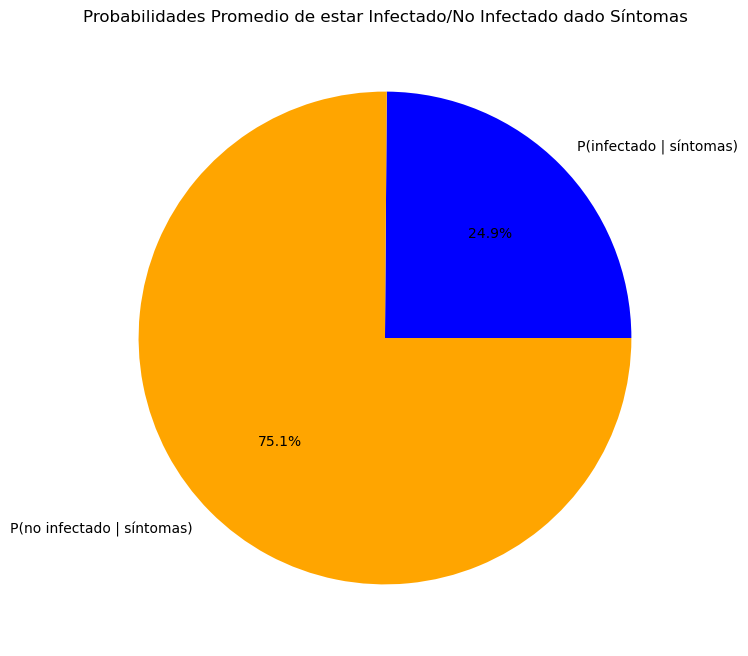

In [43]:
# Crear un gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie([mean_prob_infected, mean_prob_not_infected],
        labels=['P(infectado | síntomas)', 'P(no infectado | síntomas)'],
        autopct='%1.1f%%', colors=['blue', 'orange'])
plt.title('Probabilidades Promedio de estar Infectado/No Infectado dado Síntomas')
plt.show()

# Análisis de las métricas de rendimiento del modelo.

Nuestro modelo de clasificación tiene como objetivo identificar si un nuevo paciente está infectado o no con base en sus síntomas. A continuación, se presenta un análisis detallado de las métricas de rendimiento del modelo:

**Clasificaciones Correctas (Correct classified):** El modelo ha logrado clasificar correctamente a 50,616. Demostrando su efectividad ya que de 63360 solo obtuvo equivocadamente 12744 clasificaciones.

**Coeficiente Kappa de Cohen (Cohen's Kappa):** El coeficiente Kappa de Cohen es 0.2621, indicando una concordancia moderada más allá de lo esperado por azar. Este coeficiente es una medida robusta que tiene en cuenta la posibilidad de aciertos por casualidad.

**Precisión (Acurracy):** La precisión del modelo es del 79.89%, lo que significa que casi el 80% de las predicciones realizadas por el modelo son correctas. Este porcentaje es una indicación general del rendimiento del modelo y su capacidad para discriminar entre las clases de infectado y no infectado.


In [44]:
# Realizar predicciones en el conjunto de prueba
y_pred = naive_bayes_model.predict(X_test)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Calcular las métricas
correct_classified = conf_matrix[0, 0] + conf_matrix[1, 1]
cohen_kappa = cohen_kappa_score(y_test, y_pred)
wrong_classified = conf_matrix[0, 1] + conf_matrix[1, 0]
accuracy = accuracy_score(y_test, y_pred)
error = 1 - accuracy

# Imprimir las métricas
print("Matriz de Confusión:")
print(conf_matrix)
print("\nCorrect classified:", correct_classified)
print("Cohen's Kappa:", cohen_kappa)
print("Wrong Classified:", wrong_classified)
print("Accuracy:", accuracy)
print("Error:", error)

Matriz de Confusión:
[[47603     0]
 [12744  3013]]

Correct classified: 50616
Cohen's Kappa: 0.26213251414387784
Wrong Classified: 12744
Accuracy: 0.7988636363636363
Error: 0.20113636363636367
